In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to a DataFrame for better visualization
df_iris = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
# Convert to a DataFrame for better visualization
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


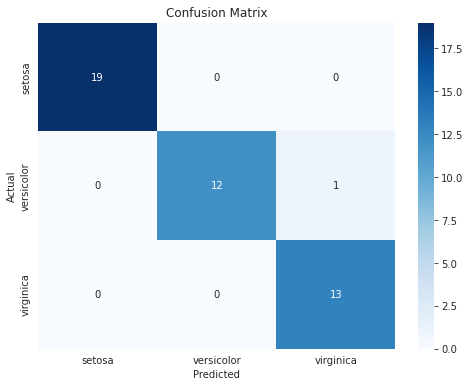

In [3]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Utility Function to Automatically Adjust Shape 


In [2]:
import numpy as np

def ensure_2d_features(X):
    """
    @author: Gobi-abyssinie
    Ensure that X is a 2D array. 
    If X is 1D, reshape it to (n_samples, 1).
    If X is already 2D, return it unchanged.
    """
    if X.ndim == 1:
        return X.reshape(-1, 1)
    elif X.ndim == 2:
        return X
    else:
        raise ValueError("Input array must be 1D or 2D")

def ensure_1d_target(y):
    """
    Ensure that y is a 1D array.
    If y is 2D with one column, reshape it to 1D.
    If y is already 1D, return it unchanged.
    """
    if y.ndim == 2 and y.shape[1] == 1:
        return y.ravel()
    elif y.ndim == 1:
        return y
    else:
        raise ValueError("Target array must be 1D or 2D with a single column")

# Example Usage

# Feature matrix X
X = np.array([1, 2, 3, 4, 5])  # 1D array
X_adjusted = ensure_2d_features(X)
print("Adjusted X shape:", X_adjusted.shape)  # Output: (5, 1)

# Target vector y
y = np.array([[1], [2], [3]])  # 2D array with one column
y_adjusted = ensure_1d_target(y)
print("Adjusted y shape:", y_adjusted.shape)  # Output: (3,)


Adjusted X shape: (5, 1)
Adjusted y shape: (3,)


In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Ensure correct shape
X_adjusted = ensure_2d_features(X)  # X is already 2D, but this is for generality
y_adjusted = ensure_1d_target(y)  # y is already 1D, but this is for generality

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_adjusted, y_adjusted, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print("Predictions:", predictions)
accuracy = accuracy_score(predictions,y_test)
accuracy

Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


1.0

# One-class SVM 

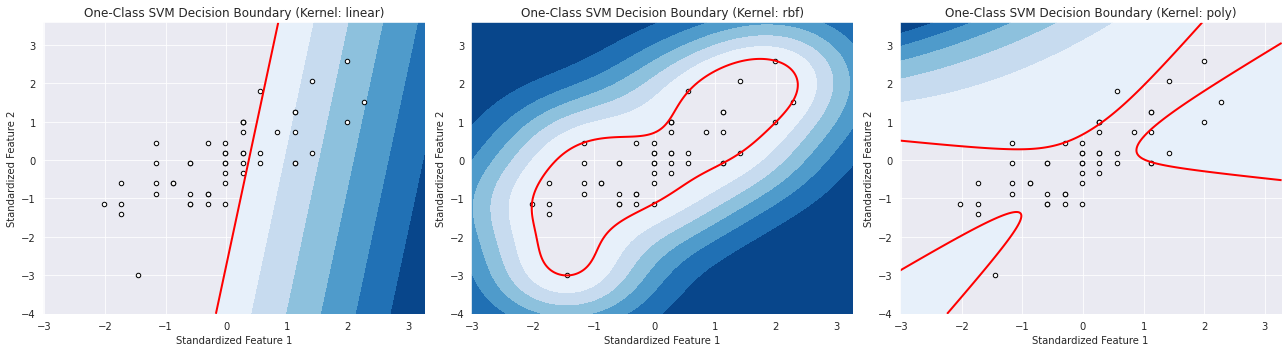

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# For simplicity, use only two features and only one class (setosa)
X = X[y == 0, :2] # select all row where y = 0, but only fpr the two first features

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Define kernels to be tested
kernels = ['linear', 'rbf', 'poly']

# Create a figure for the plots
plt.figure(figsize=(18, 5))

# Fit the One-Class SVM model with different kernels
for i, kernel in enumerate(kernels):
    model = OneClassSVM(kernel=kernel, gamma=0.5, nu=0.1)
    model.fit(X_std)

    # Predict the labels (1 for inliers, -1 for outliers)
    y_pred = model.predict(X_std)

    # Create a meshgrid to plot decision boundaries
    xx, yy = np.meshgrid(np.linspace(X_std[:, 0].min() - 1, X_std[:, 0].max() + 1, 500),
                         np.linspace(X_std[:, 1].min() - 1, X_std[:, 1].max() + 1, 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.subplot(1, 3, i + 1)
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
    a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
    plt.scatter(X_std[:, 0], X_std[:, 1], c='white', s=20, edgecolors='k')
    plt.title(f"One-Class SVM Decision Boundary (Kernel: {kernel})")
    plt.xlabel("Standardized Feature 1")
    plt.ylabel("Standardized Feature 2")

plt.tight_layout()
plt.show()


One-Class SVM fits a hyperplane that best separates the data points from the origin. **The region on one side of the hyperplane contains most of the data points (considered normal), while the other side contains outliers**.
It uses the kernel trick to project the data into a higher-dimensional space where it is easier to separate the data points.

# Unsupervised Learning: Finding the best k

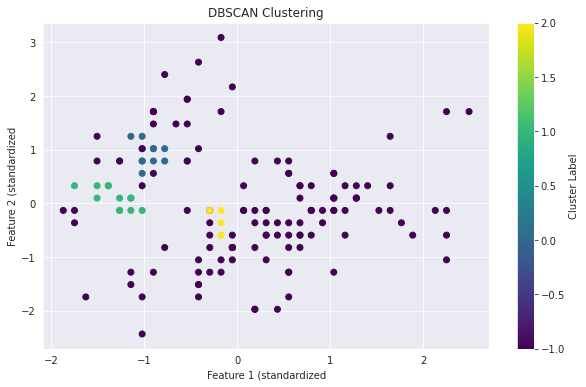

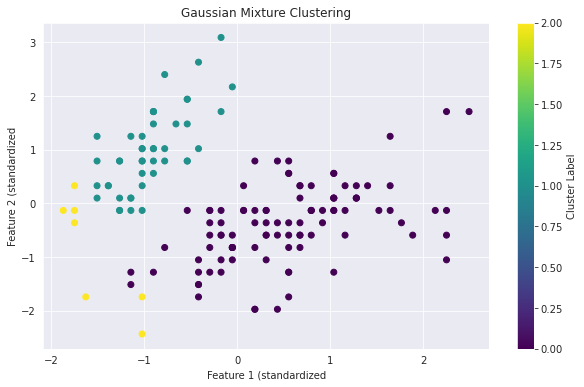

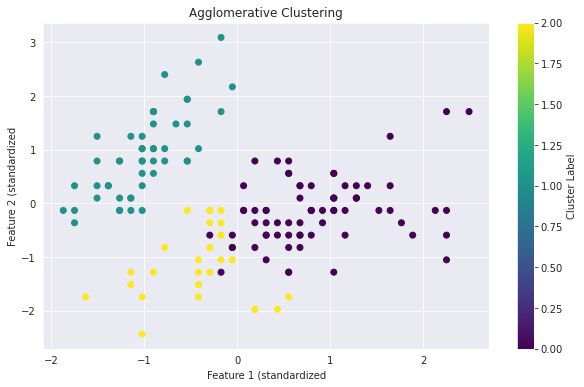

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Load the Iris dataset
iris = load_iris()
X = iris.data

# fit transform
Scaler = StandardScaler()
X_std = Scaler.fit_transform(X)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_std)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_std)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_std)


def plot_clustering(X, labels, title, centroids, **kwargs):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0],X[:, 1], c=labels, cmap='viridis', marker='o')
    if centroids is not None:
     plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroids')

    plt.title(title)
    plt.xlabel("Feature 1 (standardized")
    plt.ylabel("Feature 2 (standardized")
    plt.colorbar(label="Cluster Label")
    plt.show()
    
plot_clustering(X_std, dbscan_labels,  "DBSCAN Clustering", centroids=None)
plot_clustering(X_std, gmm_labels, "Gaussian Mixture Clustering", centroids=None)
plot_clustering(X_std, agglo_labels, "Agglomerative Clustering", centroids=None)


In [22]:
# Print the number of clusters found by DBSCAN
num_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found by DBSCAN: {num_clusters_dbscan}")

Number of clusters found by DBSCAN: 3


In [23]:
# Print the number of clusters found by DBSCAN
num_clusters_gmm = len(set(gmm_labels)) - (1 if -1 in gmm_labels else 0)
print(f"Number of clusters found by DBSCAN: {num_clusters_gmm}")

Number of clusters found by DBSCAN: 3


In [24]:
# Print the number of clusters found by DBSCAN
num_clusters_agg = len(set(agglo_labels)) - (1 if -1 in agglo_labels else 0)
print(f"Number of clusters found by DBSCAN: {num_clusters_agg}")

Number of clusters found by DBSCAN: 3


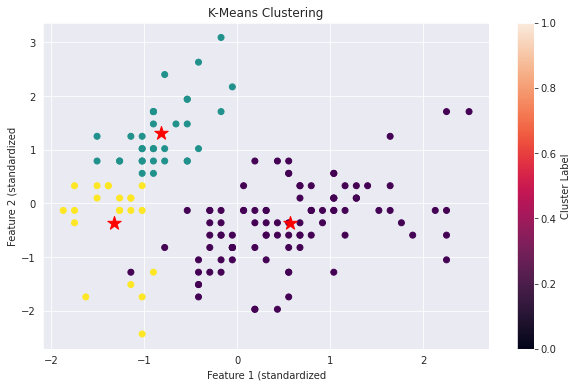

In [25]:
from sklearn.cluster import KMeans

# Initialize the K-Means model with k=3
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans_labels = kmeans.fit_predict(X_std)

# centroids
kmeans_centers = kmeans.cluster_centers_

# Plot the clustering result
plot_clustering(X_std, kmeans_labels, 'K-Means Clustering',  centroids=kmeans_centers)


# PCA With different Kernel

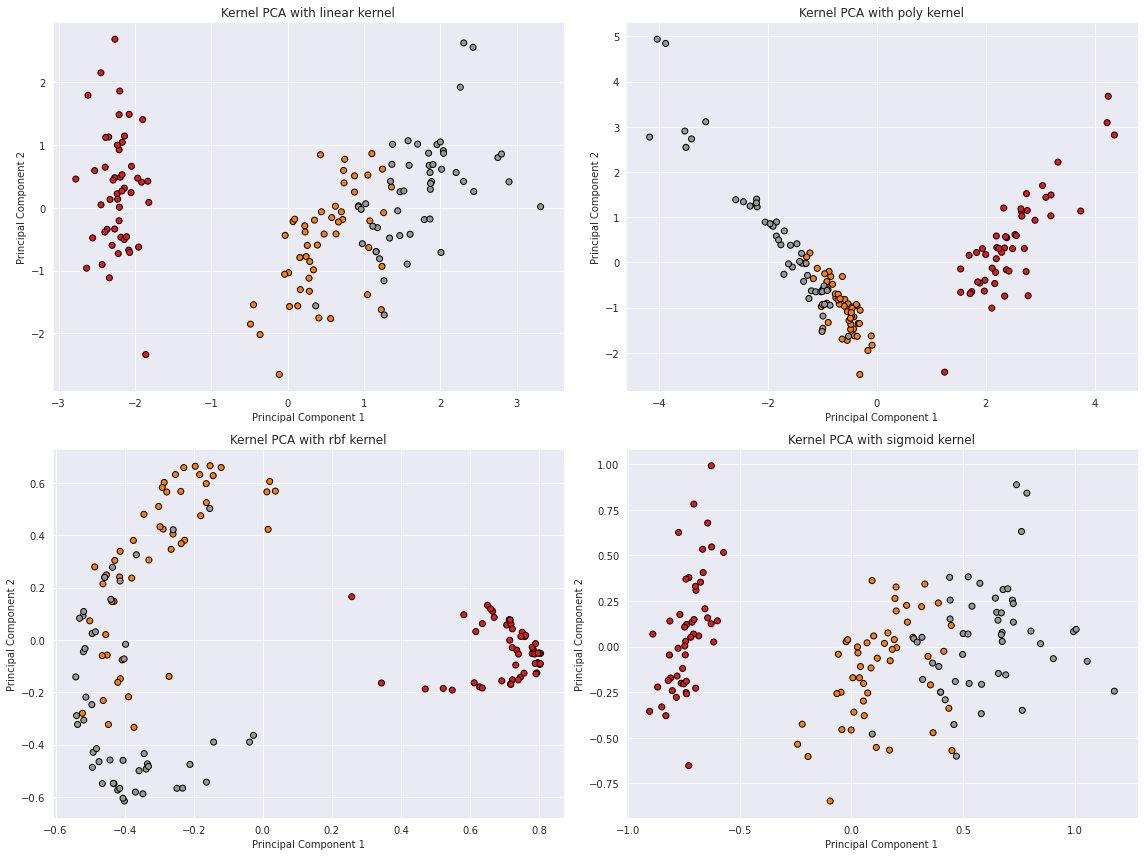

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply Kernel PCA with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kpca_results = {}

for kernel in kernels:
    kpca = KernelPCA(n_components=2, kernel=kernel)
    X_kpca = kpca.fit_transform(X_std)
    kpca_results[kernel] = X_kpca

# Plot the results
plt.figure(figsize=(16, 12))
for i, kernel in enumerate(kernels):
    plt.subplot(2, 2, i+1)
    plt.scatter(kpca_results[kernel][:, 0], kpca_results[kernel][:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
    plt.title(f'Kernel PCA with {kernel} kernel')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


# Sparse coding
Sparse coding is a type of unsupervised learning technique used to represent data in a way that allows for sparse representations. The goal of sparse coding is to find a set of basis vectors (or dictionary) such that each data point can be approximated by a linear combination of a small number of these basis vectors. This is useful in various applications, including signal processing, image compression, and feature extraction.

In [30]:
import numpy as np
from sklearn.decomposition import DictionaryLearning

# Sample data (each row is a data point)
X = np.array([[1.0, 0.5, 0.0],
              [0.5, 1.0, 0.5],
              [0.0, 0.5, 1.0]])

# Learn the dictionary from the data
dict_learner = DictionaryLearning(n_components=2, transform_algorithm='omp', transform_n_nonzero_coefs=1)
X_transformed = dict_learner.fit_transform(X)
D = dict_learner.components_

print("Learned dictionary:")
print(D)
print("Sparse codes:")
print(X_transformed)


Learned dictionary:
[[0.40824829 0.81649658 0.40824829]
 [0.         0.4472136  0.89442719]]
Sparse codes:
[[0.         0.        ]
 [0.22474487 0.        ]
 [0.         0.11803399]]
